# Netflix Data Exploratory Analysis -1 

I downloaded the ```.csv``` file from here https://www.kaggle.com/shivamb/netflix-shows

In this and the following notebooks we will explore the NetFliX data and investigate a reproducible workflow.

In [4]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('netflix_titles.csv')
# To take a quick look
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


### Explore the dataset

In [6]:
## access the first five elements
# df.head()
## access the first 3 elements
# df.head(3)
## access a random sample with 4 elements
df.sample(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3432,70298946,Movie,Camp X-Ray,Peter Sattler,"Kristen Stewart, Peyman Moaadi, John Carroll L...",United States,"January 14, 2017",2014,R,117 min,"Dramas, Independent Movies",Fresh Army recruit Amy Cole is assigned to Gua...
5367,80178971,TV Show,Charité,NaN,"Alicia von Rittberg, Maximilian Meyer-Bretschn...",Germany,"April 19, 2018",2017,TV-MA,1 Season,"International TV Shows, TV Dramas","At Berlin's Charité hospital in 1888, Ida find..."
2873,70298116,Movie,Lizzie Borden Took an Ax,Nick Gomez,"Christina Ricci, Clea DuVall, Gregg Henry, Ste...",United States,"July 25, 2016",2014,TV-14,87 min,Thrillers,This made-for-TV drama chronicles the scandal ...
1844,80170875,Movie,God's Own Country,Francis Lee,"Josh O'Connor, Alec Secareanu, Ian Hart, Gemma...",United Kingdom,"May 1, 2018",2017,TV-MA,105 min,"Dramas, Independent Movies, International Movies","In Yorkshire, a withdrawn gay farmer begins a ..."


#### Check further details

In [7]:
## lets see how many different content type there is 
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

Let's see how many different countries does these movies/series took place in

In [8]:
## Similarly let see how many different countries there are 
a = df['country']

In [9]:
type(a)
# list(a)
# Does the following gives you the whole list of countries or something else?
# list(a.unique())

pandas.core.series.Series

In [10]:
# all_countries = [i.split(',') for i in list(a.unique())]
for i in list(a.unique())[:10]:
    print(type(i), i)

<class 'str'> United States, India, South Korea, China
<class 'str'> United Kingdom
<class 'str'> United States
<class 'str'> Spain
<class 'str'> Bulgaria, United States, Spain, Canada
<class 'str'> Chile
<class 'str'> United States, United Kingdom, Denmark, Sweden
<class 'float'> nan
<class 'str'> Netherlands, Belgium, United Kingdom, United States
<class 'str'> France, Belgium


**Lets take a look at the first 10 entry**

In [11]:
a.unique()[:10]
#Notice that there is a "NaN" value

array(['United States, India, South Korea, China', 'United Kingdom',
       'United States', 'Spain', 'Bulgaria, United States, Spain, Canada',
       'Chile', 'United States, United Kingdom, Denmark, Sweden', nan,
       'Netherlands, Belgium, United Kingdom, United States',
       'France, Belgium'], dtype=object)

In [12]:
a.dropna().unique()[:10]

array(['United States, India, South Korea, China', 'United Kingdom',
       'United States', 'Spain', 'Bulgaria, United States, Spain, Canada',
       'Chile', 'United States, United Kingdom, Denmark, Sweden',
       'Netherlands, Belgium, United Kingdom, United States',
       'France, Belgium', 'United States, Uruguay'], dtype=object)

Still the cell above does not give us what we want. Instead, we can use list-comprehensions

In [13]:
all_countries = [i.split(',') for i in a.dropna()]
# we dropped the NaN values as they are float type. We do not want the uniques
# as we will need the number of occurances later

In [14]:
# Now this seperates every country but the lists are still intertwined
print(all_countries)

[['United States', ' India', ' South Korea', ' China'], ['United Kingdom'], ['United States'], ['United States'], ['United States'], ['Spain'], ['Bulgaria', ' United States', ' Spain', ' Canada'], ['Chile'], ['United States'], ['United States', ' United Kingdom', ' Denmark', ' Sweden'], ['Netherlands', ' Belgium', ' United Kingdom', ' United States'], ['France', ' Belgium'], ['United States'], ['France', ' Belgium'], ['United States', ' Uruguay'], ['United States'], ['United States'], ['United States'], ['United States', ''], ['Thailand'], ['China', ' Canada', ' United States'], ['United States'], ['Belgium', ' United Kingdom', ' United States'], ['Belgium', ' France'], ['India'], ['India'], ['France'], ['United States'], ['India'], ['United Kingdom'], ['United Kingdom'], ['United States', ' Canada'], ['Thailand'], ['Thailand'], ['Thailand'], ['Thailand'], ['Thailand'], ['Thailand'], ['United States'], ['United States'], ['United States'], ['Pakistan'], ['Canada'], ['United States'], [

#### We can do a little bit more digging, see the two cells below

In [15]:
# lets break it down
unstructured_list = [i.split(',') for i in a.dropna()]
for c_lists in unstructured_list:
    print(c_lists)

['United States', ' India', ' South Korea', ' China']
['United Kingdom']
['United States']
['United States']
['United States']
['Spain']
['Bulgaria', ' United States', ' Spain', ' Canada']
['Chile']
['United States']
['United States', ' United Kingdom', ' Denmark', ' Sweden']
['Netherlands', ' Belgium', ' United Kingdom', ' United States']
['France', ' Belgium']
['United States']
['France', ' Belgium']
['United States', ' Uruguay']
['United States']
['United States']
['United States']
['United States', '']
['Thailand']
['China', ' Canada', ' United States']
['United States']
['Belgium', ' United Kingdom', ' United States']
['Belgium', ' France']
['India']
['India']
['France']
['United States']
['India']
['United Kingdom']
['United Kingdom']
['United States', ' Canada']
['Thailand']
['Thailand']
['Thailand']
['Thailand']
['Thailand']
['Thailand']
['United States']
['United States']
['United States']
['Pakistan']
['Canada']
['United States']
['India']
['United States']
['United Kingdom',

['United Kingdom']
['India']
['India']
['India', ' France']
['France']
['United States']
['Philippines']
['Philippines']
['Philippines']
['Philippines']
['Philippines']
['South Korea']
['India', ' Germany']
['United States']
['United States']
['United States']
['Egypt']
['Egypt']
['United States']
['Japan']
['United Kingdom']
['United States']
['South Korea']
['South Korea']
['United States']
['United States']
['Egypt']
['Egypt']
['Singapore', ' United States']
['United States']
['United States']
['Ireland']
['Guatemala']
['Portugal', ' Spain']
['Turkey']
['Turkey']
['United States']
['United States']
['Turkey']
['Turkey']
['Turkey']
['Turkey']
['Turkey']
['Turkey']
['Turkey']
['Turkey']
['Turkey']
['Turkey']
['Turkey']
['Turkey']
['Turkey']
['Turkey']
['Turkey']
['Turkey']
['Turkey']
['Turkey']
['Turkey']
['Turkey']
['Turkey']
['South Korea']
['Turkey']
['Turkey']
['Turkey']
['Turkey']
['Turkey']
['France']
['Turkey']
['Turkey']
['Turkey']
['Thailand']
['United States']
['Thailand']
[

['Nigeria']
['United States']
['Japan']
['United States']
['United States', ' United Kingdom']
['Spain']
['United States']
['Nigeria']
['United Kingdom']
['United States']
['Thailand']
['United States']
['United States']
['United States']
['United States']
['Denmark']
['Norway']
['United States']
['Canada']
['Australia']
['Spain']
['United States']
['United States']
['United States']
['United States']
['France', ' Belgium']
['China']
['United States']
['Israel', ' Germany']
['France']
['United States']
['India']
['India']
['India']
['India']
['India']
['India']
['India']
['India']
['India']
['India']
['India']
['India']
['United States', ' Canada']
['India']
['United States']
['India']
['India']
['India']
['United Kingdom', ' United States']
['India']
['India']
['India']
['India']
['India']
['United Kingdom', ' United States']
['India']
['United States']
['India']
['United States']
['India']
['India']
['India']
['India']
['India']
['India']
['India']
['India']
['India']
['India']
['Ind

['United States', ' Brazil', ' South Korea', ' Mexico', ' Japan', ' Germany']
['United Kingdom']
['Canada']
['United States']
['Canada']
['United States']
['United States']
['United Kingdom']
['United States']
['Japan']
['United States']
['United States']
['Italy', ' Germany']
['United States']
['United States']
['United Kingdom']
['France', ' South Korea', ' Japan']
['United Kingdom']
['United States']
['United Kingdom']
['United States']
['Ireland']
['United States']
['United States']
['United States']
['India', ' United States']
['United Kingdom']
['United States']
['United States']
['United States']
['United Kingdom']
['Canada']
['United States']
['Australia']
['United Kingdom']
['United Kingdom']
['United Kingdom']
['United Kingdom']
['South Korea']
['South Korea']
['United States']
['France']
['United States']
['United Kingdom']
['United States']
['Canada', ' United States']
['United States']
['United Kingdom']
['Japan']
['Canada']
['United States']
['Mexico', ' United States']
[

In [16]:
## The thing we want

# mylist = []
# for c_lists in unstructured_list:
#     for country in c_lists:
#         print(country)
#         mylist.append(country.strip())

Lets do it in one go using **list comprehensions!**

In [17]:
# a little complicated list-comprehension
all_countries = [country.strip() for countrylist in [i.split(',') for i in a.dropna()] for country in countrylist]
print(all_countries)
# b = set([country.strip() for countrylist in [i.split(',') for i in a.dropna().unique()] for country in countrylist])

['United States', 'India', 'South Korea', 'China', 'United Kingdom', 'United States', 'United States', 'United States', 'Spain', 'Bulgaria', 'United States', 'Spain', 'Canada', 'Chile', 'United States', 'United States', 'United Kingdom', 'Denmark', 'Sweden', 'Netherlands', 'Belgium', 'United Kingdom', 'United States', 'France', 'Belgium', 'United States', 'France', 'Belgium', 'United States', 'Uruguay', 'United States', 'United States', 'United States', 'United States', '', 'Thailand', 'China', 'Canada', 'United States', 'United States', 'Belgium', 'United Kingdom', 'United States', 'Belgium', 'France', 'India', 'India', 'France', 'United States', 'India', 'United Kingdom', 'United Kingdom', 'United States', 'Canada', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'United States', 'United States', 'United States', 'Pakistan', 'Canada', 'United States', 'India', 'United States', 'United Kingdom', 'France', 'United States', 'United Kingdom', 'United States', 'Uni

We can see only the unique countries by using ```set()``` function. But we can also see how many movies shot in that country by constructing a dictionary.

In [18]:
# Say we want the unique ones; we can do it with 3 different ways!
# Dictionaries, numpy arrays, set!

# First, dictionaries
mydict = {}
for e in all_countries:
    if e not in mydict:
        mydict[e] = 1
    else: mydict[e] += 1

In [19]:
print(mydict)
print(len(mydict))
print(mydict['Turkey'])

{'United States': 2610, 'India': 838, 'South Korea': 162, 'China': 120, 'United Kingdom': 602, 'Spain': 178, 'Bulgaria': 8, 'Canada': 318, 'Chile': 23, 'Denmark': 38, 'Sweden': 33, 'Netherlands': 37, 'Belgium': 66, 'France': 271, 'Uruguay': 9, '': 3, 'Thailand': 56, 'Pakistan': 23, 'Turkey': 87, 'Brazil': 66, 'Italy': 67, 'Indonesia': 52, 'Ireland': 33, 'Hong Kong': 97, 'Morocco': 6, 'Mexico': 129, 'Vietnam': 4, 'Argentina': 68, 'Nigeria': 36, 'Japan': 231, 'Germany': 151, 'Greece': 8, 'Norway': 21, 'Switzerland': 15, 'United Arab Emirates': 21, 'Lebanon': 9, 'Cambodia': 3, 'Russia': 21, 'Poland': 27, 'Israel': 26, 'Australia': 126, 'Portugal': 4, 'Egypt': 54, 'Taiwan': 75, 'Austria': 10, 'Czech Republic': 15, 'Senegal': 2, 'Soviet Union': 3, 'Peru': 9, 'Ukraine': 3, 'Malaysia': 21, 'South Africa': 30, 'Nepal': 2, 'Philippines': 47, 'Serbia': 5, 'Colombia': 36, 'Singapore': 30, 'Luxembourg': 7, 'West Germany': 5, 'Cayman Islands': 1, 'New Zealand': 23, 'Venezuela': 3, 'Jordan': 6, 'Sau

In [20]:
# second numpy array
myarr = np.array(all_countries)
myunique_arr = np.unique(myarr) 
print(myunique_arr)
print(len(myunique_arr))

['' 'Afghanistan' 'Albania' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bangladesh' 'Belgium' 'Bermuda' 'Botswana' 'Brazil'
 'Bulgaria' 'Cambodia' 'Canada' 'Cayman Islands' 'Chile' 'China'
 'Colombia' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark'
 'Dominican Republic' 'East Germany' 'Ecuador' 'Egypt' 'Finland' 'France'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Hong Kong' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait' 'Latvia' 'Lebanon'
 'Liechtenstein' 'Luxembourg' 'Malawi' 'Malaysia' 'Malta' 'Mauritius'
 'Mexico' 'Mongolia' 'Montenegro' 'Morocco' 'Namibia' 'Nepal'
 'Netherlands' 'New Zealand' 'Nicaragua' 'Nigeria' 'Norway' 'Pakistan'
 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Qatar'
 'Romania' 'Russia' 'Samoa' 'Saudi Arabia' 'Senegal' 'Serbia' 'Singapore'
 'Slovakia' 'Slovenia' 'Somalia' 'South Africa' 'South Korea'
 'Soviet Union' 'Spain' 'Sri Lanka' '

In [21]:
# third and easiest
myset = set(all_countries)
print(myset)
print(len(myset))

{'', 'Iceland', 'Italy', 'Malawi', 'France', 'Bermuda', 'Croatia', 'Portugal', 'Canada', 'Hong Kong', 'Kazakhstan', 'United States', 'Belgium', 'Turkey', 'United Arab Emirates', 'Australia', 'Ukraine', 'Iran', 'Bangladesh', 'Cambodia', 'Namibia', 'Denmark', 'Uruguay', 'Luxembourg', 'Israel', 'Bulgaria', 'Soviet Union', 'Armenia', 'Botswana', 'Jordan', 'China', 'New Zealand', 'Albania', 'Dominican Republic', 'Slovenia', 'Slovakia', 'Netherlands', 'Afghanistan', 'Ecuador', 'Paraguay', 'Malta', 'United Kingdom', 'Lebanon', 'Malaysia', 'Mongolia', 'Mexico', 'Nepal', 'Pakistan', 'Ireland', 'Taiwan', 'Morocco', 'Vietnam', 'Senegal', 'Philippines', 'Egypt', 'Hungary', 'Sri Lanka', 'Greece', 'Azerbaijan', 'Somalia', 'South Africa', 'Austria', 'Japan', 'Cayman Islands', 'West Germany', 'Germany', 'Montenegro', 'Venezuela', 'Guatemala', 'East Germany', 'Finland', 'Peru', 'Czech Republic', 'Colombia', 'Singapore', 'Indonesia', 'Ghana', 'Thailand', 'Chile', 'Sweden', 'Cuba', 'Kuwait', 'Serbia', 'R

- For the purpose of keeping the counts. The most effective version is dictionaries. <br>
Let's visualize these counts

<BarContainer object of 111 artists>

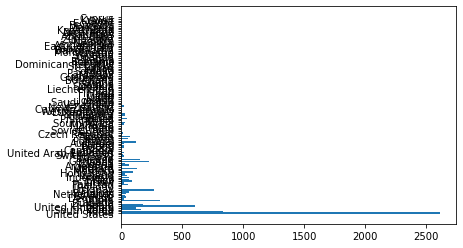

In [22]:
plt.barh(list(mydict.keys()), list(mydict.values()))

The above plot is pretty crowded, instead lets take a look at only the countries that have 100 or more movies

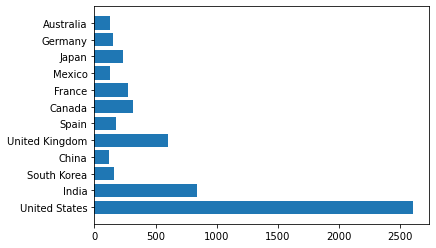

In [23]:
# use a dictionary comprehension
mynew_dict = {key:val for (key,val) in mydict.items() if val > 100}
plt.barh(list(mynew_dict.keys()), list(mynew_dict.values()));

#### Important part <br>

Lets put all we did into a function

In [33]:
def get_lengths(df,plot=False,ax=None,threshold=100, **kwargs):
    """
    Get the number of movies/series filmed in each country
    Arguments
    ---------
    df: pandas.DataFrame
        data to measure
    plot: bool
        whether or not to plot the results
    
    Returns
    -------
    A dictionary with the counts for each country
    if plot==True, also plots the results in a bar plot
    """
    # Get the countries from all movies
    all_list = [country.strip() for countrylist in [i.split(',') for i in df.dropna()] for country in countrylist]
    
    # create a dictionary with counts
    mydict = {}
    for e in all_list:
        if e not in mydict: mydict[e] = 1
        else: mydict[e] += 1
    
    # apply a threshold if given
    mynew_dict = {key:val for (key,val) in mydict.items() if val > threshold}
    
    # plot the results if asked
    if plot:
        ax = ax or plt.gca()
        ax.barh(list(mynew_dict.keys()), list(mynew_dict.values()), **kwargs)
        ax.set_xlabel('Number of content')
    
    return mydict

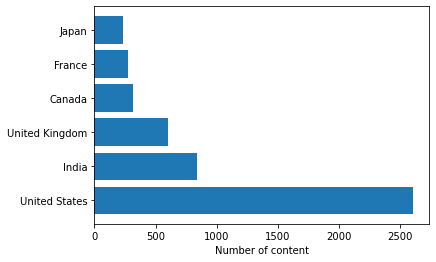

In [35]:
get_lengths(df['country'], True, threshold=200);

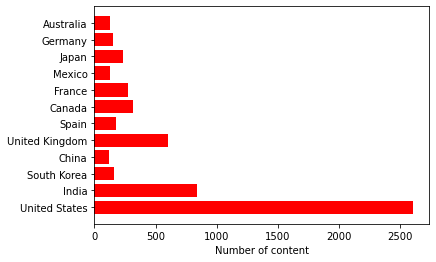

In [36]:
md = get_lengths(df['country'], True, color='red'); # added a kwarg

Notice that this function also would work for ```cast```

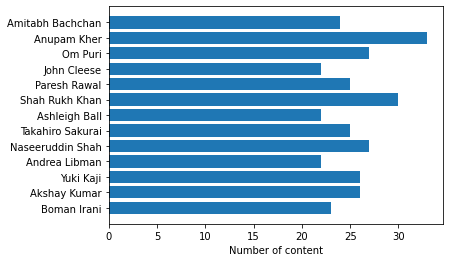

In [32]:
md = get_lengths(df['cast'], plot=True, threshold=20);